In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
np.random.seed(72018)

def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [5]:
with open('../data/boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']

In [6]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
boston_data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<Axes: >

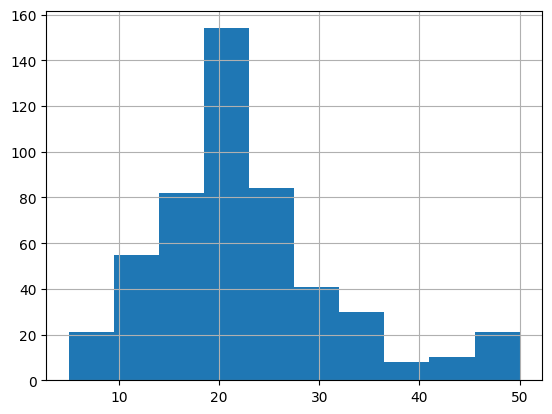

In [8]:
# Generate histogram for MEDV column
boston_data.MEDV.hist()

In [9]:
boston_data.MEDV.skew()

np.float64(1.1080984082549072)

In [19]:
# Using statistical test to check for normality
from scipy.stats.mstats import normaltest
normaltest(boston_data.MEDV.values)

#pvalue

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696095e-20))

Skewness of log-transformed MEDV: NormaltestResult(statistic=np.float64(17.21801696640698), pvalue=np.float64(0.00018245472768345196))


<Axes: >

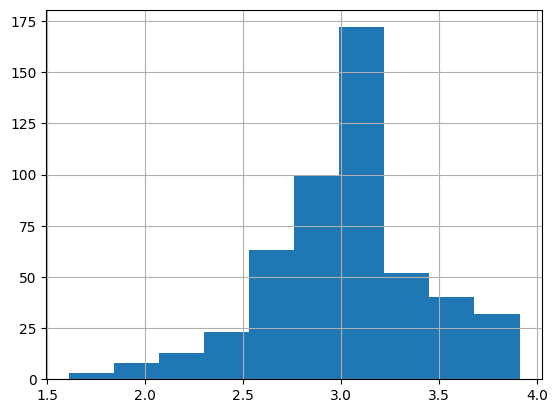

In [23]:
import seaborn as sns

log_medv = np.log(boston_data.MEDV)
print(f"Skewness of log-transformed MEDV: {normaltest(log_medv)}")

log_medv.hist()

# The output is closer to normal distribution than the original data but still not completely normal
## Using square root transformation

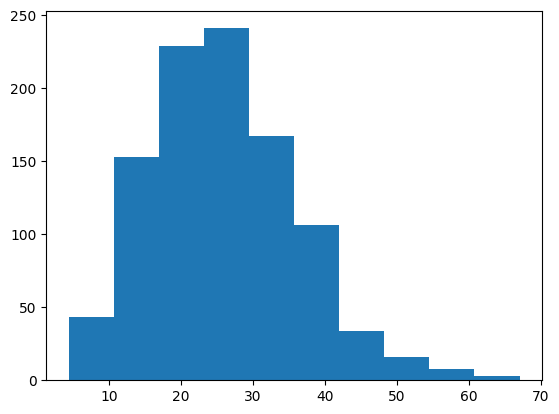

In [25]:
data = plot_square_normal_data()

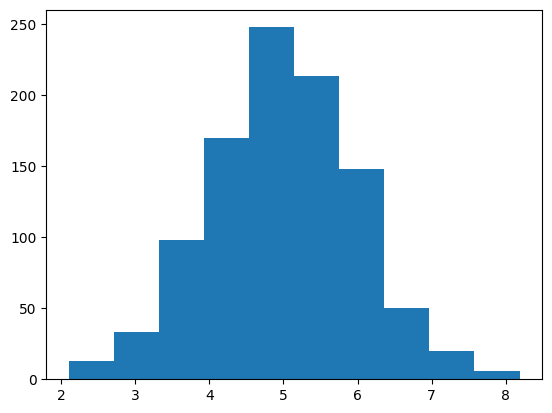

In [26]:
plt.hist(np.sqrt(data));

In [27]:
# Using square root transformation
sqrt_medv = np.sqrt(boston_data.MEDV)
print(f"Skewness of sqrt-transformed MEDV: {normaltest(sqrt_medv)}")

Skewness of sqrt-transformed MEDV: NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))


<Axes: >

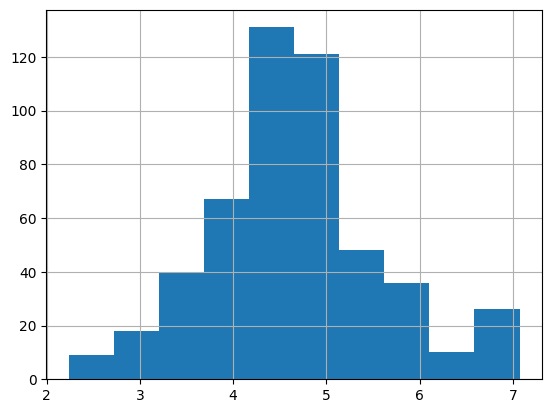

In [28]:
sqrt_medv.hist()

In [29]:
normaltest(sqrt_medv)

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

### Box cox Transformation
The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [50]:
from scipy.stats import boxcox

bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [51]:
lam

np.float64(0.21662090066621686)

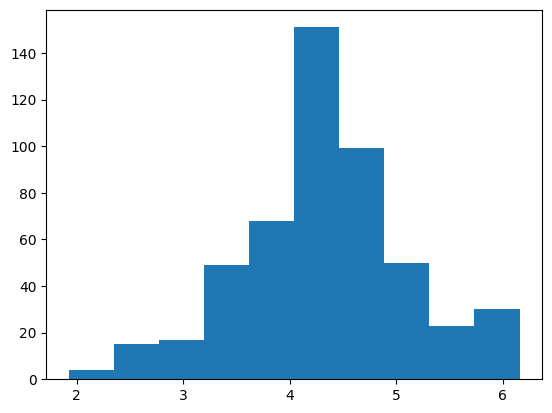

In [31]:
plt.hist(boxcox_medv);

In [32]:
normaltest(boxcox_medv)

NormaltestResult(statistic=np.float64(4.513528777459215), pvalue=np.float64(0.10468866918093607))

# Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [34]:
lr = LinearRegression()

In [36]:
# target column
y_col = "MEDV"

# X: input data -> remove target column
X = boston_data.drop(y_col, axis=1)
# Y: target column only
y = boston_data[y_col]

In [37]:
# Create Polynomial Features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [38]:
#Split training and test data - 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [39]:
# Normalize the data
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [40]:
bc_result = boxcox(y_train)
y_train_bc, lambda_val = bc_result

In [42]:
y_train_bc.shape

(354,)

# Boxcox transformation
`bc_result2 = boxcox(y_train)` returns a tuple, where the first element is the transformed data and the second element is the lambda value. The lambda value is the transformation parameter that the Box-Cox function optimizes to best transform the data.

`y_train_bc = bc_result2[0]` takes the transformed data (first value of the tuple returned above) and assigns it to `y_train_bc`.

`lam2 = bc_result2[1]` takes the lambda value (second value of the tuple returned above) and assigns it to `lam2`.

In [49]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [46]:
y_train_bc.shape

(354,)

In [48]:
# train the model
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

# Coefficient of determination
# Is very low because we're taking the transformed values
# and comparing them with the untransformed values
print(f"R^2 score: {r2_score(y_test, y_pred_bc)}")

R^2 score: -3.217600957495855


# Apply inverse transformations to be able to use these in a Regression context
Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

The Box-Cox transformation changes the scale and distribution of the data. When you transform the target variable (y_train or any other target data like MEDV in the Boston dataset) using the Box-Cox transformation, the predicted values from your model are also on this transformed scale. To interpret and compare these predictions against the original, untransformed values, you must reverse the transformation.

In [53]:
from scipy.special import inv_boxcox
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [54]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

## Inverse transformation result
The values are the same for `inv_boxcox(boxcox_medv, lam)[:10]` and `boston_data['MEDV'].values[:10]`. This means that the inverse transformation is working correctly.

## Predicting without transforming the data
We won't use any other transformation than the standard scaler for the input data. We will use the original target data to train the model and predict the target values.

In [55]:
lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test_s)

r2_score(y_test, y_pred)

0.8689110469231047